# Arithmetic

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq
from typing import *
import numpy as np

## `Add`
An n-bit addition gate.

Implements $U|a\rangle|b\rangle \rightarrow |a\rangle|a+b\rangle$ using $4n - 4 T$ gates.

#### Parameters
 - `bitsize`: Number of bits used to represent each integer. Must be large enough to hold the result in the output register of a + b. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `b`: A bitsize-sized input/output register (register b above). 

#### References
[Halving the cost of quantum addition](https://arxiv.org/abs/1709.06648)


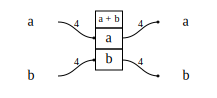

In [2]:
from qualtran.bloqs.arithmetic import Add

bloq = Add(bitsize=4)
show_bloq(bloq)

## `Product`
Compute the product of an `n` and `m` bit binary number.

Implements $U|a\rangle|b\rangle|0\rangle -\rightarrow
|a\rangle|b\rangle|a\times b\rangle$ using $2nm-n$ Toffolis.

#### Parameters
 - `a_bitsize`: Number of bits used to represent the first integer.
 - `b_bitsize`: Number of bits used to represent the second integer. 

#### Registers
 - `a`: a_bitsize-sized input register.
 - `b`: b_bitsize-sized input register.
 - `result`: A 2*max(a_bitsize, b_bitsize) bit-sized output register to store the result a*b. 

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767) pg 81 gives a Toffoli complexity for multiplying two numbers.


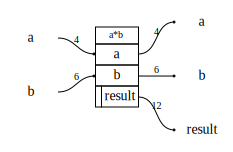

In [3]:
from qualtran.bloqs.arithmetic import Product

bloq = Product(a_bitsize=4, b_bitsize=6)
show_bloq(bloq)

## `Square`
Square an n-bit binary number.

Implements $U|a\rangle|0\rangle \rightarrow |a\rangle|a^2\rangle$ using $n^2 - n$ Toffolis.

#### Parameters
 - `bitsize`: Number of bits used to represent the integer to be squared. The result is stored in a register of size 2*bitsize. 

#### Registers
 - `a`: A bitsize-sized input register (register a above).
 - `result`: A 2-bitsize-sized input/output register. 

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767). pg 76 for Toffoli complexity.


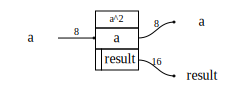

In [4]:
from qualtran.bloqs.arithmetic import Square

bloq = Square(bitsize=8)
show_bloq(bloq)

## `SumOfSquares`
Compute the sum of squares of k n-bit binary numbers.

Implements $U|a\rangle|b\rangle\dots k\rangle|0\rangle \rightarrow
    |a\rangle|b\rangle\dots|k\rangle|a^2+b^2+\dots k^2\rangle$ using
    $4 k n^2 T$ gates.

The number of bits required by the output register is 2*bitsize + ceil(log2(k)).

#### Parameters
 - `bitsize`: Number of bits used to represent each of the k integers.
 - `k`: The number of integers we want to square. 

#### Registers
 - `input`: k n-bit registers.
 - `result`: 2 * bitsize + ceil(log2(k)) sized output register. 

#### References
[Fault-Tolerant Quantum Simulations of Chemistry in First Quantization](https://arxiv.org/abs/2105.12767) pg 80 give a Toffoli complexity for squaring.


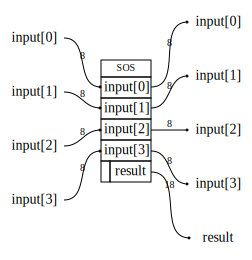

In [5]:
from qualtran.bloqs.arithmetic import SumOfSquares

bloq = SumOfSquares(bitsize=8, k=4)
show_bloq(bloq)

## `GreaterThan`
Compare two n-bit integers.

Implements $U|a\rangle|b\rangle|0\rangle \rightarrow
|a\rangle|b\rangle|a > b\rangle$ using $8n T$  gates.


#### Parameters
 - `bitsize`: Number of bits used to represent the two integers a and b. 

#### Registers
 - `a`: n-bit-sized input registers.
 - `b`: n-bit-sized input registers.
 - `result`: A single bit output register to store the result of A > B. 

#### References
[Improved techniques for preparing eigenstates of fermionic Hamiltonians](https://www.nature.com/articles/s41534-018-0071-5#additional-information), Comparison Oracle from SI: Appendix 2B (pg 3)


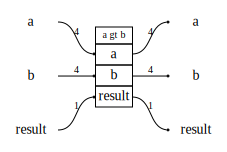

In [6]:
from qualtran.bloqs.arithmetic import GreaterThan

bloq = GreaterThan(bitsize=4)
show_bloq(bloq)

## `ScaleIntByReal`
Scale an integer by fixed-point representation of a real number.

i.e.

$$
    |r\rangle|i\rangle|0\rangle \rightarrow |r\rangle|i\rangle|r \times i\rangle
$$

The real number is assumed to be in the range [0, 1).

#### Parameters
 - `r_bitsize`: Number of bits used to represent the real number.
 - `i_bitsize`: Number of bits used to represent the integer. 

#### Registers
 - `- real_in`: r_bitsize-sized input register.
 - `- int_in`: i_bitsize-sized input register.
 - `- result`: r_bitsize output register 

#### References
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization] (https://arxiv.org/pdf/2007.07391.pdf) pg 70.


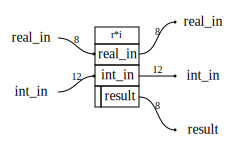

In [7]:
from qualtran.bloqs.arithmetic import ScaleIntByReal

bloq = ScaleIntByReal(r_bitsize=8, i_bitsize=12)
show_bloq(bloq)

## `MultiplyTwoReals`
Multiply two fixed-point representations of real numbers

i.e.

$$
    |a\rangle|b\rangle|0\rangle \rightarrow |a\rangle|b\rangle|a \times b\rangle
$$

The real numbers are assumed to be in the range [0, 1).

#### Parameters
 - `bitsize`: Number of bits used to represent the real number. 

#### Registers
 - `- a`: bitsize-sized input register.
 - `- b`: bitsize-sized input register.
 - `- result`: bitsize output register 

#### References
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization] (https://arxiv.org/pdf/2007.07391.pdf) pg 71.


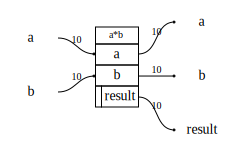

In [8]:
from qualtran.bloqs.arithmetic import MultiplyTwoReals

bloq = MultiplyTwoReals(bitsize=10)
show_bloq(bloq)

## `SquareRealNumber`
Square a fixed-point representation of a real number

i.e.

$$
    |a\rangle|0\rangle \rightarrow |a\rangle|a^2\rangle
$$

The real numbers are assumed to be in the range [0, 1).

#### Parameters
 - `bitsize`: Number of bits used to represent the real number. 

#### Registers
 - `- a`: bitsize-sized input register.
 - `- b`: bitsize-sized input register.
 - `- result`: bitsize output register 

#### References
[Compilation of Fault-Tolerant Quantum Heuristics for Combinatorial Optimization ](https://arxiv.org/pdf/2007.07391.pdf) pg 74.


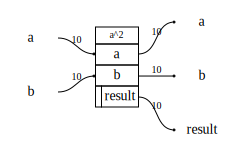

In [9]:
from qualtran.bloqs.arithmetic import SquareRealNumber

bloq = SquareRealNumber(bitsize=10)
show_bloq(bloq)